In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_path = '/Users/gwynethang/Downloads/terrorism_new.csv'
dataset = pd.read_csv(dataset_path)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataset = dataset[[
    'eventid','suicide','attacktype1_txt','weaptype1_txt','targtype1_txt','gname','nperps',
    'nkill','nwound','property','propextent','propvalue','region_txt'
]]

In [14]:
def plotSuicidePercentage(table,xlabel):
    label_name = list(table.index)
    idx = np.arange(len(table))

    total = [i+j for i,j in zip(table['0'], table['1'])]
    suicide = [i / j * 100 for i,j in zip(table['1'], total)]
    no_suicide = [i / j * 100 for i,j in zip(table['0'], total)]
    plt.figure(figsize=(20,10))
    width = 0.85
    plt.bar(idx, no_suicide, bottom=suicide, color='#CCFF99', edgecolor='blue', width=width,label='no suicide')
    plt.bar(idx, suicide, color='#00FF00', edgecolor='blue', width=width,label='suicide')

    plt.xticks(idx, label_name, rotation=60)
    plt.xlabel(xlabel)
    plt.ylabel("Percentage")
    plt.legend()
    plt.show()

## Proportion of Suicide Attacks in Attack Type

In [5]:
attack = dataset[['eventid','attacktype1_txt','suicide']]\
.groupby(['attacktype1_txt','suicide'])['eventid']\
.count()\
.to_frame()\
.reset_index()
attack = pd.pivot_table(attack,values='eventid',index=['attacktype1_txt'],columns=['suicide'])
attack.columns = ['0','1']

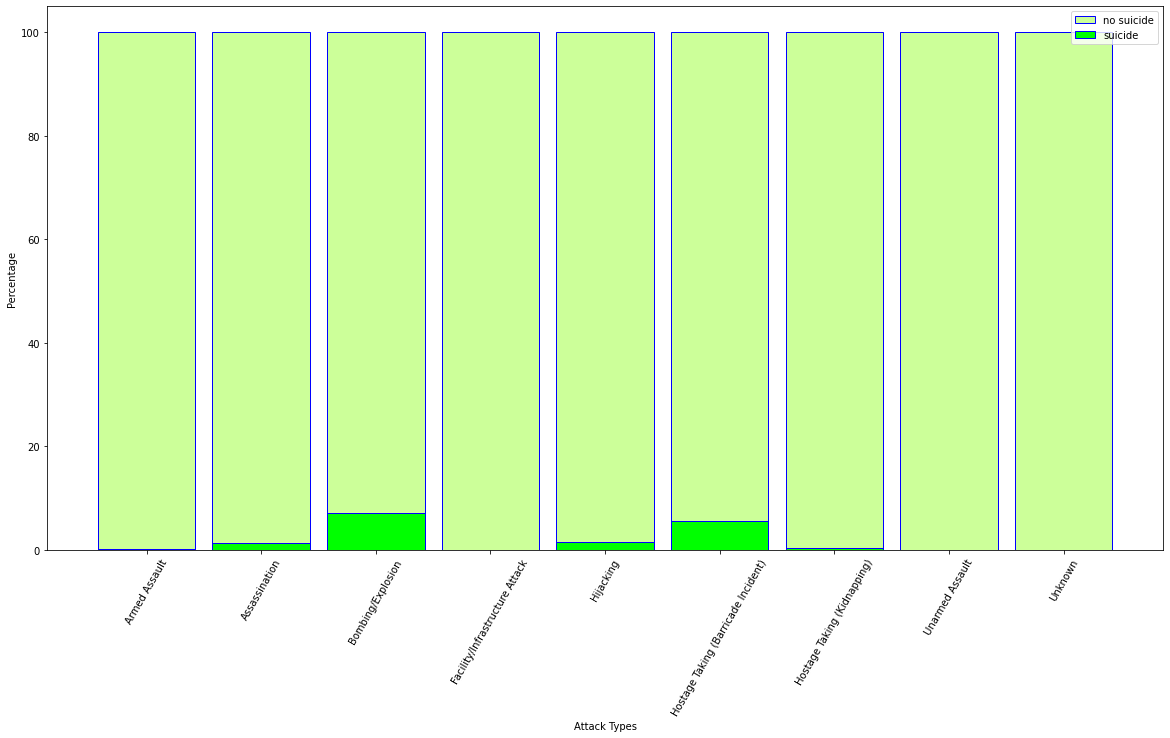

In [15]:
plotSuicidePercentage(attack,'Attack Types')

## Proportion of Suicide Attacks in Target Group

In [9]:
target_group = dataset[['eventid','targtype1_txt','suicide']]\
.groupby(['targtype1_txt','suicide'])['eventid']\
.count()\
.to_frame()\
.reset_index()
target_group = pd.pivot_table(target_group,values='eventid',index=['targtype1_txt'],columns=['suicide'])
target_group.columns = ['0','1']
# target_group
target_group['1'][0] = 0 # convert NaN to 0.

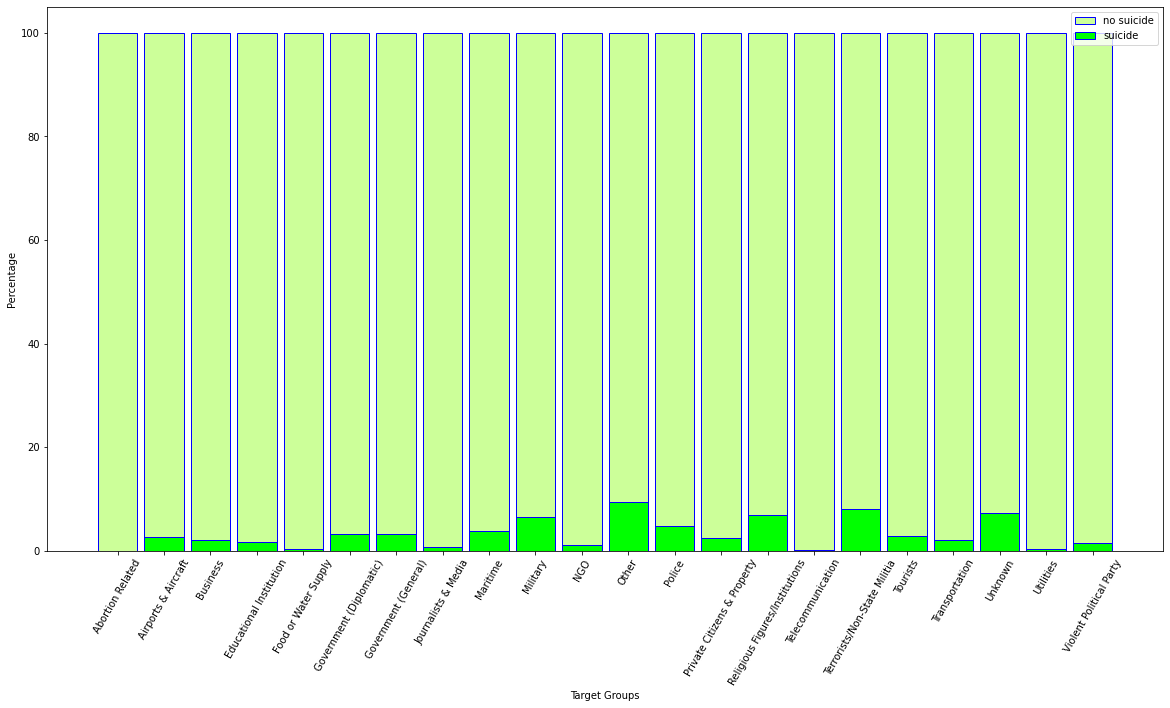

In [16]:
plotSuicidePercentage(target_group, "Target Groups")

## Proportion of Suicide Attacks in Weapon Type

In [20]:
weapon = dataset[['eventid','weaptype1_txt','suicide']]\
.groupby(['weaptype1_txt','suicide'])['eventid']\
.count()\
.to_frame()\
.reset_index()
weapon = pd.pivot_table(weapon,values='eventid',index=['weaptype1_txt'],columns=['suicide'])
weapon.columns = ['0','1']
for i in range(len(weapon['1'])):
    if pd.isna(weapon['1'][i]): 
        weapon['1'][i] = 0
# weapon

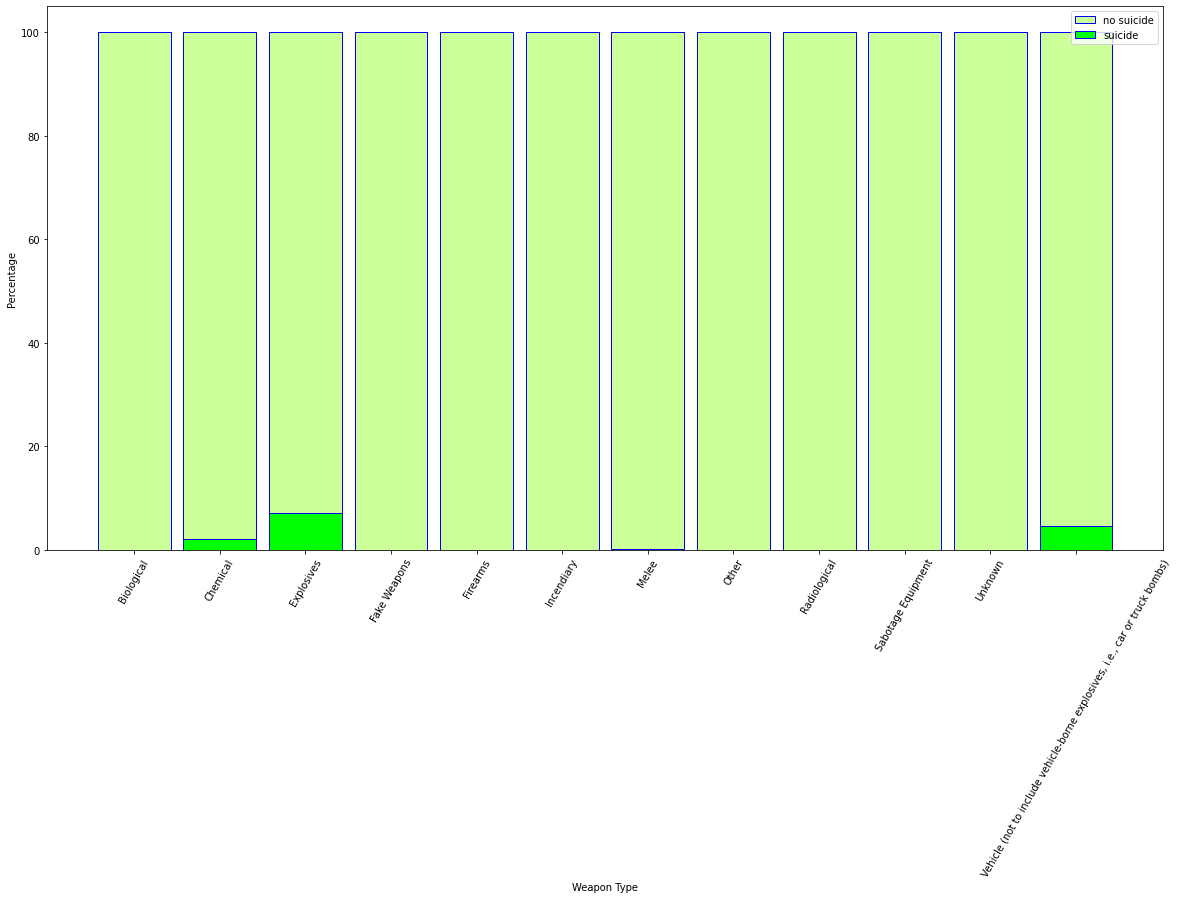

In [21]:
plotSuicidePercentage(weapon,"Weapon Type")

## Proportion by Terror Group

In [22]:
terror_group = dataset[['eventid','gname','suicide']]\
.groupby(['gname','suicide'])['eventid']\
.count()\
.to_frame()\
.reset_index()
terror_group = pd.pivot_table(terror_group,values='eventid',index=['gname'],columns=['suicide'])
terror_group.columns = ['0','1']

terror_group.dropna(subset = ["1"], inplace=True)
terror_group = terror_group.fillna(0)
# terror_group

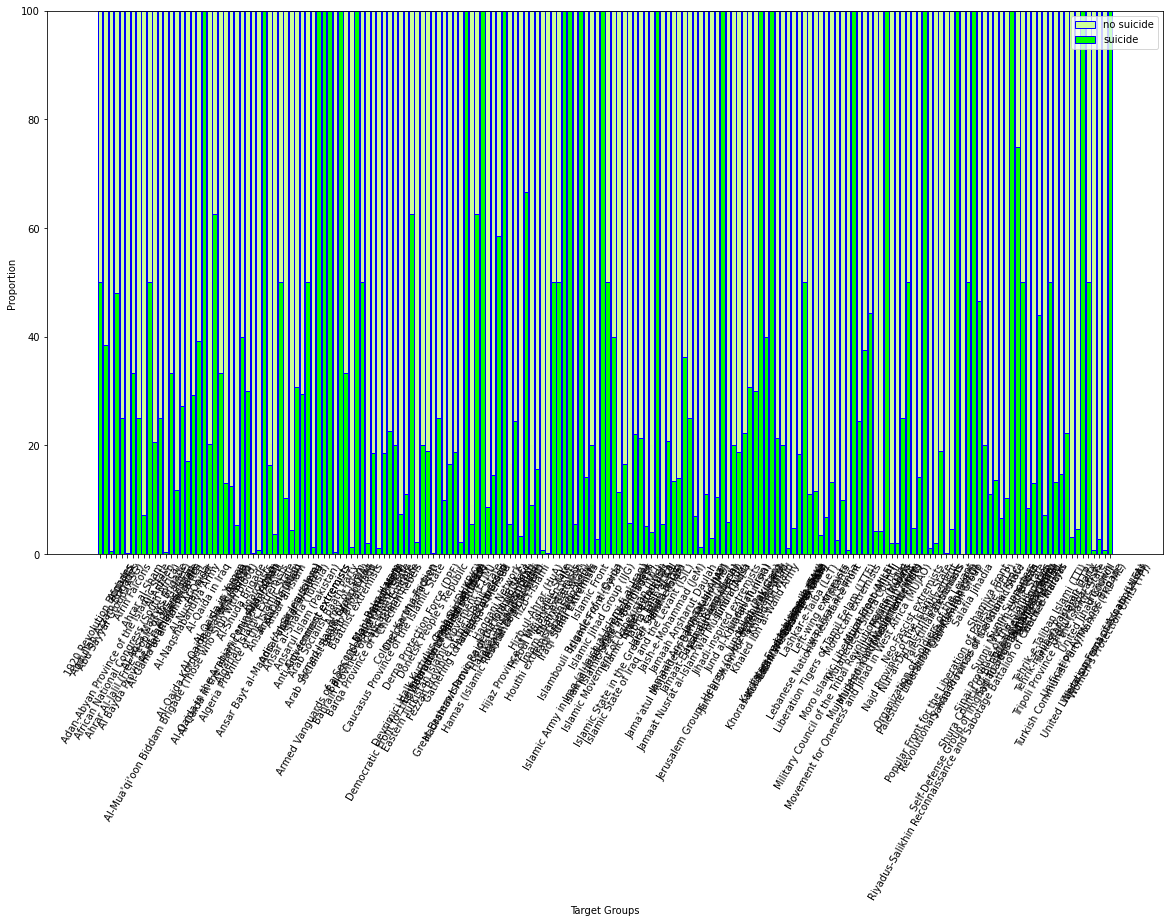

In [29]:
terror_group_name = list(terror_group.index)
idx = np.arange(len(terror_group))

total = [i+j for i,j in zip(terror_group['0'], terror_group['1'])]
suicide = [i / j * 100 for i,j in zip(terror_group['1'], total)]
no_suicide = [i / j * 100 for i,j in zip(terror_group['0'], total)]
plt.figure(figsize=(20,10))
width = 0.85
plt.bar(idx, no_suicide, bottom=suicide, color='#CCFF99', edgecolor='blue', width=width,label='no suicide')
plt.bar(idx, suicide, color='#00FF00', edgecolor='blue', width=width,label='suicide')

plt.xticks(idx, terror_group_name, rotation=60)
plt.xlabel("Target Groups")
plt.ylabel("Proportion")
plt.legend()
plt.show()

## Suicide by region

In [24]:
region = dataset[['eventid','suicide','region_txt']]\
.groupby(['suicide','region_txt'])['eventid']\
.count()\
.to_frame()\
.reset_index()
region = pd.pivot_table(region,values='eventid',index=['region_txt'],columns=['suicide'])
region.columns = ['0','1']

# region.dropna(subset = ["1"], inplace=True)
# region = region.fillna(0)

In [25]:
region

,0,1
region_txt,,
Australasia & Oceania,303,1
Central America & Caribbean,10358,1
Central Asia,559,12
East Asia,791,17
Eastern Europe,5120,97
Middle East & North Africa,49224,3886
North America,3562,17
South America,19285,7
South Asia,46202,2064


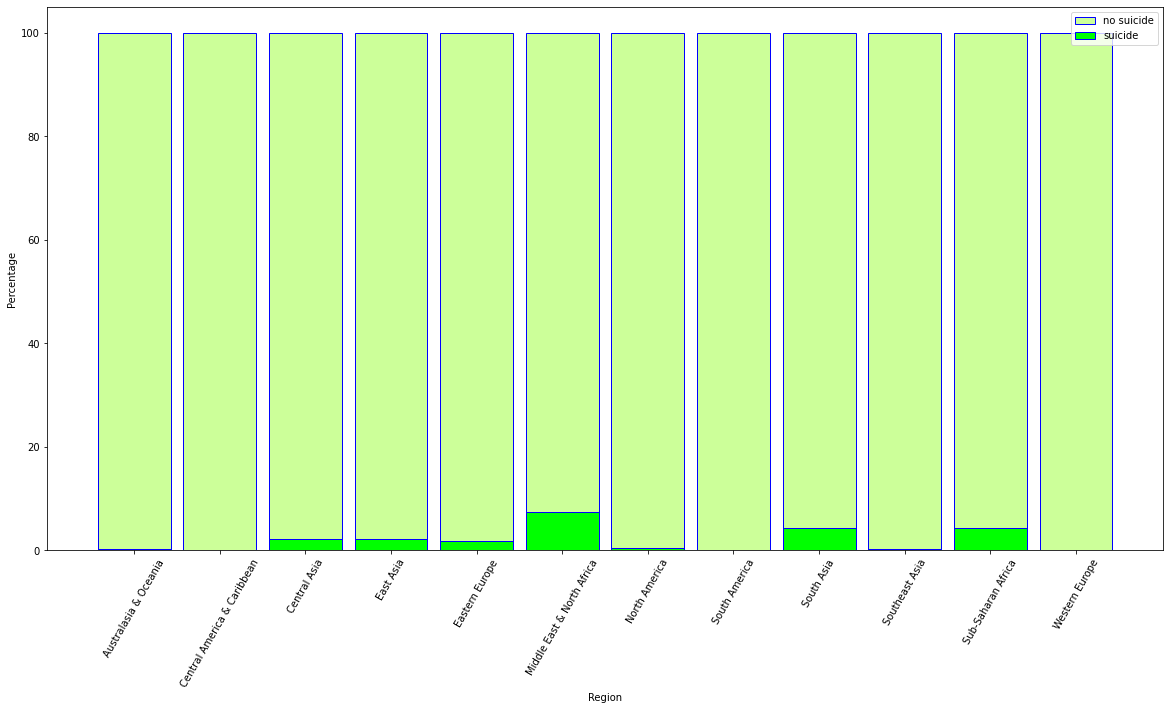

In [26]:
plotSuicidePercentage(region,"Region")

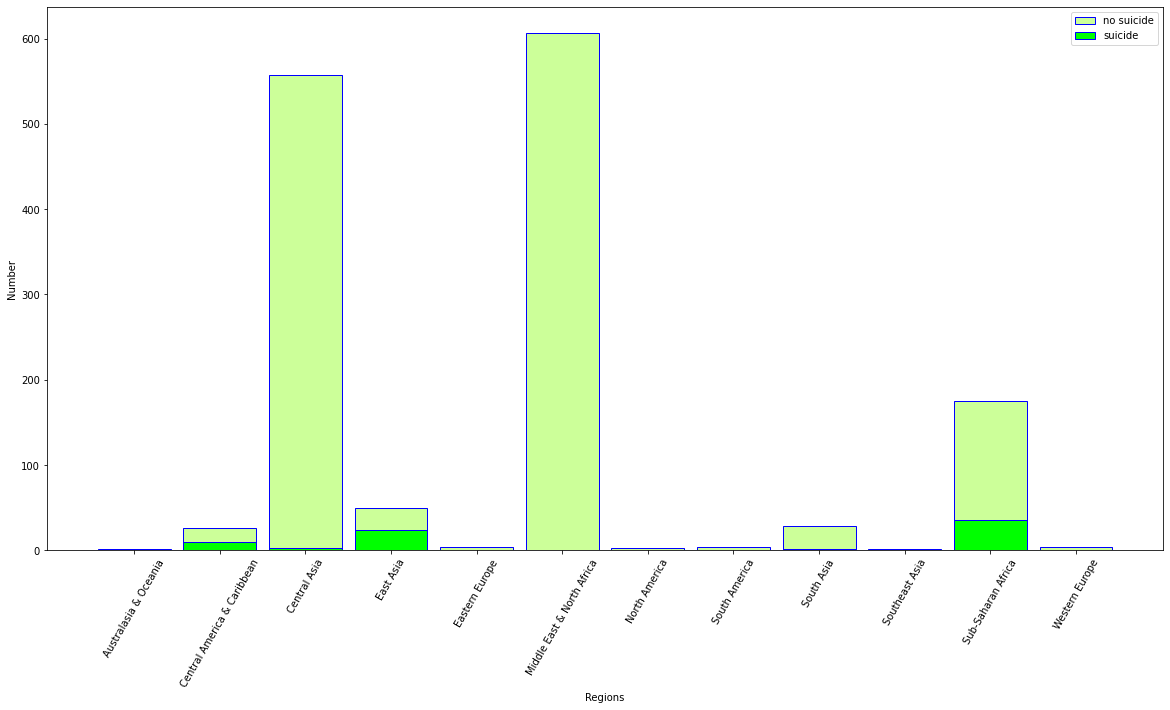

In [28]:
label_name = list(region.index)
idx = np.arange(len(region))

total = [i+j for i,j in zip(region['0'], region['1'])]
suicide = [i for i,j in zip(terror_group['1'], total)]
no_suicide = [i for i,j in zip(terror_group['0'], total)]
plt.figure(figsize=(20,10))
width = 0.85
plt.bar(idx, no_suicide, bottom=suicide, color='#CCFF99', edgecolor='blue', width=width,label='no suicide')
plt.bar(idx, suicide, color='#00FF00', edgecolor='blue', width=width,label='suicide')

plt.xticks(idx, label_name, rotation=60)
plt.xlabel("Regions")
plt.ylabel("Number")
plt.legend()
plt.show()